In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
import json
from matplotlib.patches import Arc
from numpy.linalg import norm
from random import uniform
%matplotlib inline

In [6]:
def plot_vec(vec, point=np.array([0,0]),color='m', width=0.05):
    point = np.array(point)
    vec = np.array(vec)
    projection = point+vec
#     plt.plot(point[0], point[1], 'ro', label='Point')
#     plt.plot(projection[0], projection[1], 'go', label='Projection')
    # Plot the vector from the point to the projection
    plt.arrow(point[0], point[1], projection[0] - point[0], projection[1] - point[1], width=width, color=color, label='Vector')


In [7]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
%matplotlib inline
class Car():
    def __init__(self, initial_position, direction, velocity):
        self.position = np.array(initial_position)
        self._theta = direction
        self.velocity = velocity

    def set_direction(self, theta):
        self._theta = theta
    
    def get_direction(self):
        return self._theta
        
    def get_velocity_vector(self):
        return self.velocity*np.array([np.cos(self._theta), np.sin(self._theta)])
    
    def next_position(self, dt):
        return self.position + self.get_velocity_vector()*dt
    
    def update_position(self, dt):
        self.position = self.next_position(dt)
        

def plot_line(p1,p2,x_scale):
    p1 = np.array(p1)
    p2 = np.array(p2)
    p = p2-p1
    x_min = x_scale[0]
    x_max = x_scale[1]
    x = np.linspace(x_min, x_max)
    if p1[1]-p2[1] != 0:
        m = (p1[1]-p2[1])/(p1[0]-p2[0])
        y = m*(x-p1[0])+p1[1]
        plt.plot(x,y, '--')
    else:
        y = np.ones(len(x))*p1[1]
        plt.plot(x,y, '--')

def plot_path(path):
    for t in range(len(path)-1):
        p1 = path[t]
        p2 = path[t+1]
        p = np.array([p1[0], p2[0]])
        plot_line(p1,p2,p)
        
# path = np.array([[1,0], [2,1], [4,5],[6,5]])
# plot_path(path)

def point_distance(p1, p2):
    return norm(p2-p1)

def line_point_distance(line, point):
    p = line[1]-line[0]
    n = np.array([-p[1],p[0]])
    n_hat = n/norm(n)
    return point@n_hat
    
def passed_section(p1, p2, point):
    p = p2-p1
    p3 = p2-point
    return p@p3 < 0

def distance_to_end_section(p1, p2, point):
    p = p2-p1
    p_hat = p/norm(p)
    p3 = p2-point
    return p_hat@p3


def find_next_section(path, position,current_index, threshold):
    if current_index == len(path)-2:
        return current_index
    have_passed_section = passed_section(path[current_index], path[current_index+1], position)
    if  have_passed_section:
        return current_index + 1
    if (not have_passed_section) and (distance_to_end_section(path[current_index], path[current_index+1], position) < threshold):
        return current_index + 1
    return current_index


def plot_arc(start_angle, end_angle, radius=0.5, center=(0, 0), **kwargs):
    ax = plt.gca()
    if start_angle > end_angle:
        arc= Arc(center, radius*2, radius*2, angle=0, theta1=end_angle, theta2=start_angle)
    else:
        arc= Arc(center, radius*2, radius*2, angle=0, theta1=start_angle, theta2=end_angle)
    ax.add_patch(arc)

In [8]:
# def pvec(vec, color='b', label=None):
#     vec = np.array(vec)
#     plt.arrow(0, 0, vec[0],vec[1], width=0.1, color=color, label=label)


    


# def normal_vector(v1, v2):
#     v1 = np.array(v1)
#     v2 = np.array(v2)
#     v3 = np.array([-v1[1], v1[0]])  # create a vector perpendicular to v2
#     dot = np.dot(v2, v3)
#     if dot > 0:
#         v3 = -v3  # flip the vector if it points in the wrong direction
#     return v3


# def angle_to_normal(v1, v2):
#     n = normal_vector(v1, v2)
#     angle = vangle(v2, n)
#     if np.cross(v2, v1) > 0:
#         if angle < 0:
#             return 2*np.pi + angle
#         return  angle
    
#     if angle > 0:
#         return angle - 2*np.pi
#     return angle


# def non_negative_angle(angle: float) -> float:
#     if angle > 0:
#         return angle
#     return 2*np.pi + angle

# def inner_angle(v1, v2=None):
#     angle1 = non_negative_angle(math.atan2(v1[1], v1[0]))
#     if v2 is None:
#         return angle1
#     angle2 = non_negative_angle(math.atan2(v2[1], v2[0]))
#     angle = max(angle1, angle2) - min(angle1, angle2)
#     if angle < np.pi:
#         return angle
#     return 2*np.pi - angle

# def v1_right_to_v2(v1, v2):
#     cross_product = np.cross(v2, v1)
#     return cross_product > 0



# def is_clock_wise_angle(p1, p2, point):
#     p = p2-p1
#     n = np.array([-p[1],p[0]])
#     n_hat = n/norm(n)
#     return point@n_hat < 0



# def clockwise_angle_between_vectors(v1, v2):
#     perp_v1 = np.array([-v1[1], v1[0]])
#     dot_v2_perp_v1 = np.dot(v2, perp_v1)
#     dot_v1_v2 = np.dot(v1, v2)
#     theta = np.arctan2(dot_v2_perp_v1, dot_v1_v2)
#     if theta < 0:
#         theta += 2 * np.pi
#     return theta

# def distance_controller(position, velocity: np.ndarray, line: np.ndarray):
#     line_pointing = line[1] - line[0]
#     n = normal_from_other_side(line_pointing, position)
#     angle = inner_angle(velocity, n)
#     if is_clock_wise_angle(line[0], line[1],  position):
#         return clockwise_angle_between_vectors(v, n)
#     return -1*clockwise_angle_between_vectors(n, v)


# My algorithm

distance term using pid

In [9]:
class PID:
    def __init__(self, kp, ki, kd):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.last_error = 0
        self.int_error = 0


    def __call__(self, error, dt=1):
        ed = (error-self.last_error)*dt
        self.int_error += error
        self.last_error = error
        pid_value = self.kp*error + self.ki*self.int_error + self.kd*ed
        return 

    
    

## distance term using abs

In [10]:

def is_p_above_line(line, p):
    p1, p2 = line
    area = np.cross(p2 - p1, p - p1)
    if area > 0:
        return True
    else:
        return False

def normal_from_other_side(v1, v2):
    v1 = line[1] - line[0]
    v3 = np.array([-v1[1], v1[0]])  # create a vector perpendicular to v2
    v3 = v3/norm(v3)
    dot = np.dot(v2, v3)
    if is_p_above_line(line, v2):
        v3 = -v3  # flip the vector if it points in the wrong direction
    return v3


def is_clock_wise_angle(v1, v2):
    v1 = hat(v1)
    v2 = hat(v2)
    dot = v1[0]*-1*v2[1] + v1[1]*v2[0]
    return dot > 0

def clockwise_angle_between_vectors(v1, v2):
    perp_v1 = np.array([-v1[1], v1[0]])
    dot_v2_perp_v1 = np.dot(v2, perp_v1)
    dot_v1_v2 = np.dot(v1, v2)
    theta = np.arctan2(dot_v2_perp_v1, dot_v1_v2)
    if theta < 0:
        theta += 2 * np.pi
    return theta

def distance_controller(position, velocity: np.ndarray, line: np.ndarray):
    line_pointing = line[1] - line[0]
    n = normal_from_other_side(line, position)
    if  is_clock_wise_angle(n,  velocity):
        return clockwise_angle_between_vectors(v, n)
    return -1*clockwise_angle_between_vectors(n, v)




NameError: name 'hat' is not defined

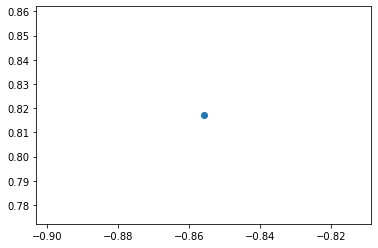

In [11]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
%matplotlib inline
#hyper parameters
dt = 1
learning_rate = 0.1

#initial parameters
initial_velocity = 0.5
initial_theta = 0
initial_pos = np.array([2,-1])
p1 = np.array([2,1])
p2 = np.array([4,5])

initial_pos = np.array([uniform(-1, 1), uniform(-1, 1)])
p1 = np.array([uniform(-1, 1), uniform(-1, 1)])
p2 = np.array([uniform(-1, 1), uniform(-1, 1)])
line = np.array([p1, p2])

p = p2-p1
plt.scatter(initial_pos[0], initial_pos[1])
car = Car(initial_pos, initial_theta, initial_velocity)


car_path = [initial_pos]

for t in range(8):
    theta = car.get_direction()
    velocity = car.velocity
    v_hat = np.array([np.cos(theta), np.sin(theta)])
    v = velocity*v_hat

    d = abs(line_point_distance(line, car.position))
    d_theta = distance_controller(car.position, v, line)
    print(is_clock_wise_angle(line,  car.position), d_theta*180/np.pi)
    w = 1
    proportional = (w*d/(w*d+1))
    proportional = 0.5
    new_theta =theta + d_theta* proportional
    
    n = normal_from_other_side(line, car.position)
    plot_vec(n*0.1, car.position, width=0.01)
    
    car.set_direction(new_theta)
    car.update_position(dt)
    car_path.append(car.position)
    
# plot_vec(p/2)
plot_line(p1, p2, [0,2])
car_path  =np.array(car_path)
plt.plot(car_path[:,0], car_path[:,1])
plot_vec(p, (0,0))




In [12]:
# losses = np.array(losses)
# plt.plot(losses)
# plt.xlabel("itteration")
# plt.ylabel("loss")
# plt.title("distance loss")

## Minimizing angle

In [13]:
hat = lambda v: v/norm(v)

def non_negative_angle(angle: float) -> float:
    if angle > 0:
        return angle
    return 2*np.pi + angle

def inner_angle(v1, v2=None):
    angle1 = non_negative_angle(math.atan2(v1[1], v1[0]))
    if v2 is None:
        return angle1
    angle2 = non_negative_angle(math.atan2(v2[1], v2[0]))
    angle = max(angle1, angle2) - min(angle1, angle2)
    if angle < np.pi:
        return angle
    return 2*np.pi - angle







def is_clock_wise_angle(v1, v2):
    v1 = hat(v1)
    v2 = hat(v2)
    dot = v1[0]*-1*v2[1] + v1[1]*v2[0]
    return dot > 0

def clockwise_angle_between_vectors(v1, v2):
    perp_v1 = np.array([-v1[1], v1[0]])
    dot_v2_perp_v1 = np.dot(v2, perp_v1)
    dot_v1_v2 = np.dot(v1, v2)
    theta = np.arctan2(dot_v2_perp_v1, dot_v1_v2)
    if theta < 0:
        theta += 2 * np.pi
    return theta


def angle_controller(line, direction):
    p = line[1]-line[0]
    angle = inner_angle(p, direction)
    if is_clock_wise_angle(p,  direction):
        return angle
    return -1*angle

(-4.0, 4.0)

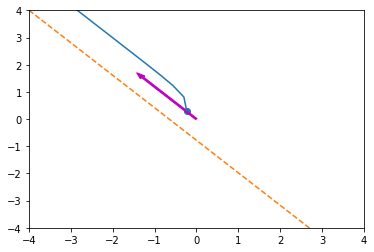

In [14]:
import numpy as np
%matplotlib inline
#hyper parameters
dt = 1

#initial parameters
initial_velocity = 0.5
initial_theta = 0
initial_pos = np.array([0,2])

# p1 = np.array([0,0])
# p2 = np.array([-1,-1])
# p1 = np.array([uniform(-1, 1), uniform(-1, 1)])

initial_pos = np.array([uniform(-1, 1), uniform(-1, 1)])
p2 = np.array([uniform(-1, 1), uniform(-1, 1)])
line = np.array([p1, p2])
p = p2-p1
plt.scatter(initial_pos[0], initial_pos[1])
car = Car(initial_pos, initial_theta, initial_velocity)


car_path = [initial_pos]

for t in range(20):
    theta = car.get_direction()
    velocity = car.velocity
    v_hat = np.array([np.cos(theta), np.sin(theta)])
    v = velocity*v_hat

    # n = normal_from_other_side(p, v)
    # plot_vec(n*0.1, car.position, width=0.01)
    # plot_vec(v*2, car.position, width=0.02, color='g')

    d = abs(line_point_distance(line, car.position))
    d_theta = angle_controller(line, v_hat)
    w = 1
    proportional = 0.75 #(w*d/(w*d+1))
    new_theta =theta + d_theta* proportional

    
    car.set_direction(new_theta)
    car.update_position(dt)
    car_path.append(car.position)
    


car_path  =np.array(car_path)
plt.plot(car_path[:,0], car_path[:,1])
# plot_line(p1, p2, [-1,-1])
plot_vec(hat(p)*2, (0,0))
plot_line(p1, p2, [-4,4]) 
plt.xlim([-4,4])
plt.ylim([-4,4])


In [15]:
p

array([-0.6849669 ,  0.81898267])

In [16]:
# losses = np.array(losses)
# plt.plot(losses)
# plt.xlabel("itteration")
# plt.ylabel("loss")
# plt.title("angle loss")

# random()*2 - 

## Combain the losses

In [49]:

def is_p_above_line(line, p):
    p1, p2 = line
    area = np.cross(p2 - p1, p - p1)
    if area > 0:
        return True
    else:
        return False

def normal_from_other_side(v1, v2):
    v1 = line[1] - line[0]
    v3 = np.array([-v1[1], v1[0]])  # create a vector perpendicular to v2
    v3 = v3/norm(v3)
    dot = np.dot(v2, v3)
    if is_p_above_line(line, v2):
        v3 = -v3  # flip the vector if it points in the wrong direction
    return v3


def is_clock_wise_angle(v1, v2):
    v1 = hat(v1)
    v2 = hat(v2)
    dot = v1[0]*-1*v2[1] + v1[1]*v2[0]
    return dot > 0

def clockwise_angle_between_vectors(v1, v2):
    perp_v1 = np.array([-v1[1], v1[0]])
    dot_v2_perp_v1 = np.dot(v2, perp_v1)
    dot_v1_v2 = np.dot(v1, v2)
    theta = np.arctan2(dot_v2_perp_v1, dot_v1_v2)
    if theta < 0:
        theta += 2 * np.pi
    return theta

def distance_controller(position, velocity: np.ndarray, line: np.ndarray):
    line_pointing = line[1] - line[0]
    n = normal_from_other_side(line, position)
    if  is_clock_wise_angle(n,  velocity):
        return clockwise_angle_between_vectors(v, n)
    return -1*clockwise_angle_between_vectors(n, v)


hat = lambda v: v/norm(v)

def non_negative_angle(angle: float) -> float:
    if angle > 0:
        return angle
    return 2*np.pi + angle

def inner_angle(v1, v2=None):
    angle1 = non_negative_angle(math.atan2(v1[1], v1[0]))
    if v2 is None:
        return angle1
    angle2 = non_negative_angle(math.atan2(v2[1], v2[0]))
    angle = max(angle1, angle2) - min(angle1, angle2)
    if angle < np.pi:
        return angle
    return 2*np.pi - angle


def angle_controller(line, direction):
    p = line[1]-line[0]
    angle = inner_angle(p, direction)
    if is_clock_wise_angle(p,  direction):
        return angle
    return -1*angle



# pointing controller

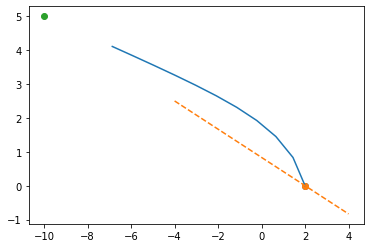

In [58]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
%matplotlib inline

def next_point_controller(point, position, velocity_vector):
    pointing_vector = point-position
    angle = inner_angle(velocity_vector, pointing_vector)
    if is_clock_wise_angle(pointing_vector,  velocity_vector):
        return angle
    return -1*angle

#hyper parameters
dt = 1
learning_reate = 1
w = 0.1
#initial parameters
initial_velocity = 1
initial_theta = uniform(-np.pi, np.pi)
initial_theta = np.pi/2
initial_pos = np.array([2,0])
#initial parameters

# initial_pos = np.array([uniform(-1, 1), uniform(-1, 1)])
initial_pos = np.array([2, 0])
# p1 = np.array([uniform(-1, 1), uniform(-1, 1)])
p1 = initial_pos
# p2 = np.array([uniform(-1, 1), uniform(-1, 1)])
p2 = np.array([-10, 5])

 
line = np.array([p1, p2])

# initial_pos = p1
p = p2-p1

plt.scatter(initial_pos[0], initial_pos[1])
plt.scatter(p1[0], p1[1])
plt.scatter(p2[0], p2[1])
car = Car(initial_pos, initial_theta, initial_velocity)


car_path = [initial_pos]

for t in range(10):
    theta = car.get_direction()
    velocity = car.velocity
    v_hat = np.array([np.cos(theta), np.sin(theta)])
    v = velocity*v_hat

    d = abs(line_point_distance(line, car.position))
    distance_direction_change = distance_controller(car.position, v, line)
    parallel_direction_change = angle_controller(line, v_hat)
    
    d_theta = 0.5*next_point_controller(p2, car.position, v)
    new_theta =theta +  d_theta


    car.set_direction(new_theta)
    car.update_position(dt)
    car_path.append(car.position)
    

car_path  =np.array(car_path)
plt.plot(car_path[:,0], car_path[:,1])



# plot_vec(hat(p)*2, (0,0), width=0.1)

plot_line(p1, p2, [-4,4]) 
# plt.xlim([-6,6])
# plt.ylim([-2,2])


# COmbined losses

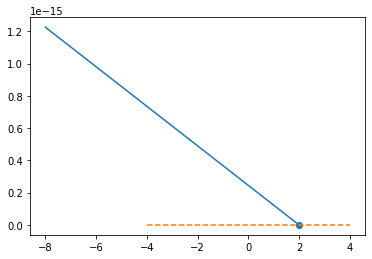

In [61]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
%matplotlib inline
#hyper parameters
dt = 1
learning_reate = 1
w = 0.1
#initial parameters
initial_velocity = 1
initial_theta = uniform(-np.pi, np.pi)
initial_theta = np.pi/2
initial_pos = np.array([2,0])
#initial parameters

initial_pos = np.array([uniform(-1, 1), uniform(-1, 1)])
initial_pos = np.array([2, 0])
p1 = np.array([uniform(-1, 1), uniform(-1, 1)])
p1 = initial_pos
p2 = np.array([uniform(-1, 1), uniform(-1, 1)])
p2 = p1+np.array([-1, 0])

 
line = np.array([p1, p2])

# initial_pos = p1
p = p2-p1

plt.scatter(initial_pos[0], initial_pos[1])
car = Car(initial_pos, initial_theta, initial_velocity)


car_path = [initial_pos]

for t in range(10):
    theta = car.get_direction()
    velocity = car.velocity
    v_hat = np.array([np.cos(theta), np.sin(theta)])
    v = velocity*v_hat

    d = abs(line_point_distance(line, car.position))
    distance_direction_change = distance_controller(car.position, v, line)
    parallel_direction_change = angle_controller(line, v_hat)
    
    proportional = (w*d/(w*d+1))
    d_theta = (1-proportional)*parallel_direction_change + proportional*distance_direction_change
    new_theta =theta +  d_theta


    car.set_direction(new_theta)
    car.update_position(dt)
    car_path.append(car.position)
    

car_path  =np.array(car_path)
plt.plot(car_path[:,0], car_path[:,1])



# plot_vec(hat(p)*2, (0,0), width=0.1)

plot_line(p1, p2, [-4,4]) 


## Now try path

In [100]:
class Car():
    def __init__(self, initial_position, direction, velocity):
        self.position = np.array(initial_position)
        self._theta = direction
        self.velocity = velocity

    def set_direction(self, theta):
        self._theta = theta
    
    def get_direction(self):
        return self._theta
        
    def get_velocity_vector(self):
        return self.velocity*np.array([np.cos(self._theta), np.sin(self._theta)])
    
    def next_position(self, dt):
        return self.position + self.get_velocity_vector()*dt
    
    def update_position(self, dt):
        self.position = self.next_position(dt)


def plot_line(p1,p2,x_scale):
    p1 = np.array(p1)
    p2 = np.array(p2)
    p = p2-p1
    x_min = x_scale[0]
    x_max = x_scale[1]
    x = np.linspace(x_min, x_max)
    if p1[0]-p2[0] != 0:
        m = (p1[1]-p2[1])/(p1[0]-p2[0])
        y = m*(x-p1[0])+p1[1]
        plt.plot(x,y, '--')
    else:
        y = np.linspace(min(p1[1], p2[1]), max(p1[1], p2[1]))
        x = np.ones(len(y))*p1[0]
        plt.plot(x,y, '--')

def plot_path(path):
    for t in range(len(path)-1):
        p1 = path[t]
        p2 = path[t+1]
        p = np.array([p1[0], p2[0]])
        plot_line(p1,p2,p)
        
# path = np.array([[1,0], [2,1], [4,5],[6,5]])
# plot_path(path)

def point_distance(p1, p2):
    return norm(p2-p1)

def line_point_distance(line, point):
    p = line[1]-line[0]
    n = np.array([-p[1],p[0]])
    n_hat = hat(n)
    return np.dot(point, n_hat)
    


def distance_to_end_section(line, point):
    p = line[1]-line[0]
    p_hat = hat(p)
    p3 = line[1]-point
    return np.dot(p_hat,p3)

def passed_section(line, point):
    return distance_to_end_section(line, point) < 0


def find_next_section(path, position,current_index, threshold):
    line = np.array([path[current_index], path[current_index+1]])
    if current_index == len(path)-2:
        return current_index
    have_passed_section = passed_section(line, position)
    if  have_passed_section:
        return current_index + 1
    if (not have_passed_section) and (distance_to_end_section(line, position) < threshold):
        return current_index + 1
    return current_index



In [101]:

def is_p_above_line(line, p):
    p1, p2 = line
    area = np.cross(p2 - p1, p - p1)
    if area > 0:
        return True
    else:
        return False

def normal_from_other_side(v1, v2):
    v1 = line[1] - line[0]
    v3 = np.array([-v1[1], v1[0]])  # create a vector perpendicular to v2
    v3 = v3/norm(v3)
    dot = np.dot(v2, v3)
    if is_p_above_line(line, v2):
        v3 = -v3  # flip the vector if it points in the wrong direction
    return v3


def is_clock_wise_angle(v1, v2):
    v1 = hat(v1)
    v2 = hat(v2)
    dot = v1[0]*-1*v2[1] + v1[1]*v2[0]
    return dot > 0

def clockwise_angle_between_vectors(v1, v2):
    perp_v1 = np.array([-v1[1], v1[0]])
    dot_v2_perp_v1 = np.dot(v2, perp_v1)
    dot_v1_v2 = np.dot(v1, v2)
    theta = np.arctan2(dot_v2_perp_v1, dot_v1_v2)
    if theta < 0:
        theta += 2 * np.pi
    return theta

def distance_controller(position, velocity: np.ndarray, line: np.ndarray):
    line_pointing = line[1] - line[0]
    n = normal_from_other_side(line, position)
    if  is_clock_wise_angle(n,  velocity):
        return clockwise_angle_between_vectors(v, n)
    return -1*clockwise_angle_between_vectors(n, v)


hat = lambda v: v/norm(v)

def non_negative_angle(angle: float) -> float:
    if angle > 0:
        return angle
    return 2*np.pi + angle

def inner_angle(v1, v2=None):
    angle1 = non_negative_angle(math.atan2(v1[1], v1[0]))
    if v2 is None:
        return angle1
    angle2 = non_negative_angle(math.atan2(v2[1], v2[0]))
    angle = max(angle1, angle2) - min(angle1, angle2)
    if angle < np.pi:
        return angle
    return 2*np.pi - angle


def angle_controller(line, direction):
    p = line[1]-line[0]
    angle = inner_angle(p, direction)
    if is_clock_wise_angle(p,  direction):
        return angle
    return -1*angle


def next_point_controller(point, position, velocity_vector):
    pointing_vector = point-position
    angle = inner_angle(velocity_vector, pointing_vector)
    if is_clock_wise_angle(pointing_vector,  velocity_vector):
        return angle
    return -1*angle

In [116]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from math import atan2
%matplotlib inline


def simulation(w, end_section_threshold, learning_rate, path,initial_pos, initial_velocity, initial_theta, dt, max_itteration):
    
    pt = initial_pos

    car = Car(initial_pos, initial_theta, initial_velocity)
    plt.scatter(initial_pos[0], initial_pos[1])
    car_path = [initial_pos]

    i = 0
    for t in range(max_itteration):
        old_i = i
        line = np.array([path[i], path[i+1]])
        if i == len(path)-1 and passed_section(line, car.position):
            break
        i = find_next_section(path, car.position ,i, end_section_threshold)
        if (old_i != i):
            print("new i ", i)

        

        theta = car.get_direction()
        velocity = car.velocity
        v_hat = np.array([np.cos(theta), np.sin(theta)])
        v = velocity*v_hat

        d = abs(line_point_distance(line, car.position))
        distance_direction_change = distance_controller(car.position, v, line)
        parallel_direction_change = angle_controller(line, v_hat)
        
        proportional = (w*d/(w*d+1))
        d_theta = (1-proportional)*parallel_direction_change + proportional*distance_direction_change
        d_theta = 0.2*next_point_controller(line[1], car.position, v)
        new_theta =theta +  d_theta

        car.set_direction(new_theta)
        car.update_position(dt)
        car_path.append(car.position)
        # print("distance ", distance_to_end_section(line, car.position))
    



    car_path = np.array(car_path)
    plt.plot(car_path[:,0], car_path[:,1],  label=f' w {w}')
    plt.legend()
    

    plot_path(path)


## path

new i  1
new i  2
new i  3


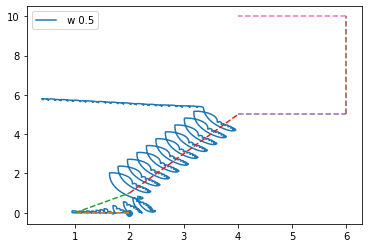

In [117]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
%matplotlib inline
#hyper parameters
w = 0.5
end_section_threshold = 0.01
initial_velocity = 0.1
dt = 0.5
learning_rate = 0.5

initial_pos = np.array([2,0])
#initial parameters
path = np.array([initial_pos, [1,0], [2,1], [4,5],[6,5], [6, 10], [4,10]])
# path = path[:4]

initial_theta = np.pi/2

simulation(w, end_section_threshold, learning_rate, path,initial_pos, initial_velocity, initial_theta, dt, 1000)
# plt.xlim([0.5, 1.25])

array([10.,  0.])

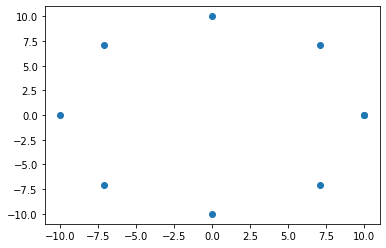

In [118]:
r = 10
theta = np.linspace(0, 2*np.pi, 9)
x = r*np.cos(theta)
y = r*np.sin(theta)
circle_path = np.array([x, y]).transpose()

plt.scatter(*zip(*circle_path))
circle_path[0]

new i  1
new i  2
new i  3
new i  4


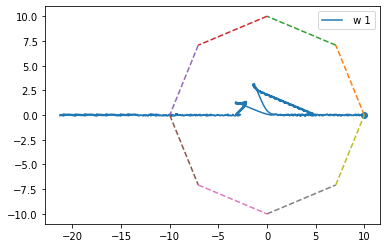

In [119]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
%matplotlib inline
#hyper parameters
loss_ratio = 0
# kd = loss_ratio
# ka = 1-loss_ratio
w = 1
end_section_threshold = 0.5
initial_velocity = 1
dt = 0.1
learning_rate = 0

initial_pos = circle_path[0]
#initial parameters
path = circle_path
loss_ratio = 0.8

initial_theta = np.pi/2

simulation(w, end_section_threshold, learning_rate, path,initial_pos, initial_velocity, initial_theta, dt, 1000)

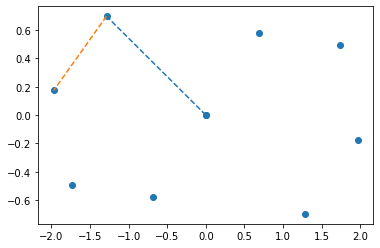

In [120]:
import numpy as np
import matplotlib.pyplot as plt

def infinity_sign(radius):
    theta = np.linspace(-np.pi, np.pi, 10)
    x = radius * np.sin(theta)
    y = radius * np.sin(theta) * np.cos(theta) / (1 + np.sin(theta) ** 2)
    path1 = np.column_stack((x, y))
    path2 = np.column_stack((x, -y))
    return path1 #np.concatenate([path1, path2])

# Generate the infinity sign path
infinity = infinity_sign(2)
plt.scatter(*zip(*infinity))
path = infinity
path = path[:3]
plot_path(path)
# vecs = path[1:]-path[:-1]
# for point, vec in  zip(points, vecs):
#     plot_vec(point, vec)

0.8 0.8 0.19999999999999996


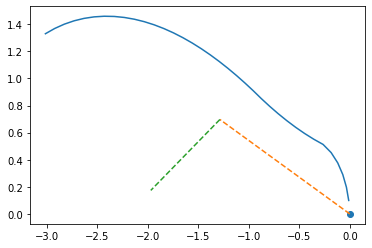

In [77]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
%matplotlib inline
#hyper parameters
loss_ratio = 0.8
kd = loss_ratio
ka = 1-loss_ratio
w = 1
end_section_threshold = 1
learning_rate = 1


#initial parameters

loss_ratio = 0.8
initial_pos = np.array([0,0])
pt = initial_pos
dt = 0.1
initial_velocity = 1
initial_theta = np.pi/2
simulation(loss_ratio , w, end_section_threshold, learning_rate, path,initial_pos, initial_velocity, initial_theta, dt, 100)

# Using stanley 

In [110]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
%matplotlib inline


def simulation(loss_ratio , w, end_section_threshold, learning_rate, path,initial_pos, initial_velocity, initial_theta, dt, max_itteration):
    #hyper parameters
#     loss_ratio = 0.8
    kd = loss_ratio
    ka = 1-loss_ratio
    w = 1
#     end_section_threshold = 1
#     learning_rate = 1


    #initial parameters
#     path = np.array([initial_pos, [1,0], [2,1], [4,5],[6,5]])


#     initial_pos = np.array([0,0])
    pt = initial_pos
#     dt = 0.1
#     initial_velocity = 1
#     initial_theta = 0
    car = Car(initial_pos, initial_theta, initial_velocity)
    losses = []
    # positions = [initial_pos]
    plt.scatter(initial_pos[0], initial_pos[1])
    car_path = []

    i = 0
    for t in range(max_itteration):
        #if got to the end
        if i == len(path)-2 and passed_section(path[i], path[i+1], pt):
            break

#         i = find_next_section(path, pt,i, end_section_threshold)
        

        p1 = path[i]
        p2 = path[i+1]
        p = p2-p1
        n = np.array([-p[1],p[0]])
        n_hat = n/norm(n)
        
        

        pt = car.position.copy()
        theta = car.get_direction()
        velocity = car.velocity
        
        




        v_hat = np.array([np.cos(theta), np.sin(theta)])
        v = velocity*v_hat
        p_next = car.next_position(dt)
        c = p1-p_next
        d_tilda = c@n_hat
        d = abs(d_tilda)
        
        
        
        x_hat = np.array([1,0])
        n_angle = np.arccos(x_hat@n_hat)
        psi = n_angle-theta
        vf = velocity
        e = d
        k=1
        ks= 1
        delta = psi + np.arctan(k*e/(ks+vf))
        
        new_theta = delta
        
        
#         theta_l = np.arctan(p[1]/p[0])
#         theta_error_tilda = theta-theta_l
#         theta_error = abs(theta_error_tilda)
#         ct = p1 - pt
        
        



#         ld_grad = velocity*dt*np.sign(d_tilda)*(n_hat[0]*np.sin(theta)-n_hat[1]*np.cos(theta))
#         la_grad = np.exp(-w*distance_t)*np.sign(theta_error_tilda)
#         grad = ka*la_grad+kd*ld_grad

#         loss_d = d
#         loss_angle = theta_error*np.exp(-w*d)
#         loss = ka*loss_angle+kd*loss_d
#         losses.append(loss)

#         new_theta = theta-learning_rate*grad
        car.set_direction(new_theta)
    
        p_next = car.next_position(dt)
        car.update_position(dt)
        car_path.append(p_next)
#     print(car_path)
    car_path = np.array(car_path)
    plt.plot(car_path[:,0], car_path[:,1])
#         plt.scatter(p_next[0], p_next[1], c='b', s=0.5)




    last_position = car.position


    plot_path(path)


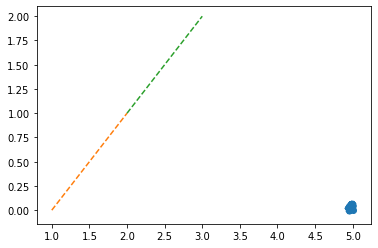

In [111]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
%matplotlib inline
#hyper parameters
loss_ratio = 0.8
kd = loss_ratio
ka = 1-loss_ratio
w = 10
end_section_threshold = 0.5
initial_velocity = 1
dt = 0.1
learning_rate = w*dt*initial_velocity

initial_pos = np.array([5,0])
#initial parameters
path = np.array([[1,0], [2,1], [3,2]])

loss_ratio = 0.8

pt = initial_pos

initial_theta = 0 #np.pi/2
simulation(loss_ratio , w, end_section_threshold, learning_rate, path,initial_pos, initial_velocity, initial_theta, dt, 100)